### [fredr](https://cran.r-project.org/web/packages/fredr/vignettes/fredr.html)

In [1]:
library(fredr)
fredr_set_key("bd4355a0bcb45a05a7280e4d99a4d146")

#### Downloading by state by industry

In [2]:
states = c('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
           'Colorado', 'Connecticut', 'Delaware', 
            'Florida', 'Georgia',  'Hawaii', 'Idaho',
           'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
           'Maine', 'Maryland', 'Massachusetts', 'Michigan', 
           'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
           'Nevada',  'New Hampshire', 'New Jersey',
           'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
           'Oklahoma', 'Oregon', 'Pennsylvania',   'Rhode Island',
            'South Carolina', 'South Dakota',
            'Tennessee', 'Texas',  'Utah',
           'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
           'Wyoming')

In [ ]:
# 'District of Columbia', 'Far West', 'Great Lakes', 'Mideast', 'New England', 'Rocky Mountain', 'Plains',   'Southeast', 'Southwest',

In [3]:
length(states)

[1] 50

In [17]:
industries = c ('Accommodation and food services',
                'Administrative and waste management services',
                'Agriculture, forestry, fishing, and hunting',
                'All industry total', 'Arts, entertainment, and recreation',
                'Construction', 'Educational services', 'Finance and insurance',
                'Government', 'Health care and social assistance', 'Information',
                'Management of companies and enterprises', 'Manufacturing',
                'Mining', 'Other services, except government',
                'Private industries',
                'Professional, scientific, and technical services',
                'Real estate and rental and leasing', 'Retail trade',
                'Transportation and warehousing', 'Utilities', 'Wholesale trade')

In [18]:
dict = c()

for (state in states){
  
  data = fredr_series_search_text(search_text = paste("Real Gross Domestic Product by Industry", state ) , filter_variable = "frequency", filter_value = "Quarterly") 
  
  data = subset(data, units == "Millions of Chained 2012 Dollars")
  
  dict = rbind(dict, data.frame(data$id, data$title)  )
  
}

In [19]:
head(dict)

data.id         
1 ALRQGSP         
2 ALINFORQGSP     
3 ALAGRRQGSP      
4 ALRETAILRQGSP   
5 ALTRANSWARERQGSP
6 ALNDURMANRQGSP  
  data.title                                                                                                          
1 Total Real Gross Domestic Product by Industry for Alabama                                                           
2 Real Gross Domestic Product by Industry: Private Industries: Information for Alabama                                
3 Real Gross Domestic Product by Industry: Private Industries: Agriculture, Forestry, Fishing, and Hunting for Alabama
4 Real Gross Domestic Product by Industry: Private Industries: Retail Trade for Alabama                               
5 Real Gross Domestic Product by Industry: Private Industries: Transportation and Warehousing for Alabama             
6 Real Gross Domestic Product by Industry: Private Industries: Nondurable Goods Manufacturing for Alabama

In [20]:
id_list = as.character(dict$data.id)
head(id_list)

[1] "ALRQGSP"          "ALINFORQGSP"      "ALAGRRQGSP"       "ALRETAILRQGSP"   
[5] "ALTRANSWARERQGSP" "ALNDURMANRQGSP"

In [55]:
gdp_us = c()
for (id in id_list){
    gdp_us = rbind(gdp_us, fredr(series_id = id )  )}

In [57]:
dim(gdp_us)

[1] 64655     3

In [46]:
dim(dict)

[1] 1200    2

In [47]:
1200/50

[1] 24

In [63]:
head(gdp_us)

date       series_id value   
1 2005-01-01 ALRQGSP   179355.5
2 2005-04-01 ALRQGSP   181373.0
3 2005-07-01 ALRQGSP   181292.6
4 2005-10-01 ALRQGSP   183522.6
5 2006-01-01 ALRQGSP   183884.5
6 2006-04-01 ALRQGSP   185071.6

In [64]:
write.csv(dict, file = "dictionary.csv")

write.csv(gdp_us, file = "naus_unlabelled.csv")

In [65]:
library(purrr)

gdp_us_1 = map_dfr(id_list, fredr) 

In [ ]:
gdp_us_1

### Download by state

In [7]:
data = fredr_series_search_text(search_text = paste("Real Gross Domestic Product") , filter_variable = "frequency", filter_value = "Quarterly") 
data = subset(data, units == "Millions of Chained 2012 Dollars")

In [15]:
subset(data, id  =='RVAAI')

id    realtime_start realtime_end title                                     
1 RVAAI 2019-02-17     2019-02-17   Real Value Added by Gross Domestic Product
  observation_start observation_end frequency frequency_short
1 2005-01-01        2018-04-01      Quarterly Q              
  units                            units_short        
1 Millions of Chained 2012 Dollars Mil. of Chn. 2012 $
  seasonal_adjustment             seasonal_adjustment_short
1 Seasonally Adjusted Annual Rate SAAR                     
  last_updated           popularity group_popularity
1 2018-11-01 16:52:26-05 5          5               
  notes                                                                                                                                                                                                                                       
1 According to the source, value added represents the sum of the costs-incurred and the incomes-earned in production, and consists of compensation of employees, taxes on production and imports, less subsidies, and gross operating surplus.

In [21]:
data = fredr_series_search_text(search_text = paste("Real Gross Domestic Product") , filter_variable = "frequency", filter_value = "Quarterly") 
data = subset(data, units == "Billions of Chained 2012 Dollars")
data = subset(data, seasonal_adjustment == "Seasonally Adjusted Annual Rate")
data

id                realtime_start realtime_end
1  GDPC1             2019-02-17     2019-02-17  
2  PCECC96           2019-02-17     2019-02-17  
3  DPIC96            2019-02-17     2019-02-17  
4  GPDIC1            2019-02-17     2019-02-17  
5  EXPGSC1           2019-02-17     2019-02-17  
6  IMPGSC1           2019-02-17     2019-02-17  
7  GCEC1             2019-02-17     2019-02-17  
8  GNPC96            2019-02-17     2019-02-17  
9  PNFIC1            2019-02-17     2019-02-17  
10 PCDGCC96          2019-02-17     2019-02-17  
11 Y033RX1Q020SBEA   2019-02-17     2019-02-17  
12 NETEXC            2019-02-17     2019-02-17  
13 PCNDGC96          2019-02-17     2019-02-17  
14 PRFIC1            2019-02-17     2019-02-17  
15 PCESVC96          2019-02-17     2019-02-17  
16 A261RX1Q020SBEA   2019-02-17     2019-02-17  
17 PIECTR            2019-02-17     2019-02-17  
18 A015RX1Q020SBEA   2019-02-17     2019-02-17  
19 B009RX1Q020SBEA   2019-02-17     2019-02-17  
20 FINSLC1           2019-02-17     2019-02-17  
21 A023RX1Q020SBEA   2019-02-17     2019-02-17  
22 CBIC1             2019-02-17     2019-02-17  
23 C307RX1Q020SBEA   2019-02-17     2019-02-17  
24 FPIC1             2019-02-17     2019-02-17  
25 A824RX1Q020SBEA   2019-02-17     2019-02-17  
26 DHLCRX1Q020SBEA   2019-02-17     2019-02-17  
27 A713RX1Q020SBEA   2019-02-17     2019-02-17  
28 LB0000091Q020SBEA 2019-02-17     2019-02-17  
29 DPCCRX1Q020SBEA   2019-02-17     2019-02-17  
30 A358RX1Q020SBEA   2019-02-17     2019-02-17  
⋮  ⋮                 ⋮              ⋮           
66 AR05RX1Q020SBEA   2019-02-17     2019-02-17  
67 C191RX1Q020SBEA   2019-02-17     2019-02-17  
68 DGOERX1Q020SBEA   2019-02-17     2019-02-17  
69 DIFSRX1Q020SBEA   2019-02-17     2019-02-17  
70 A679RX1Q020SBEA   2019-02-17     2019-02-17  
71 A681RX1Q020SBEA   2019-02-17     2019-02-17  
72 B1065X1Q020SBEA   2019-02-17     2019-02-17  
73 A955RX1Q020SBEA   2019-02-17     2019-02-17  
74 DNRGRX1Q020SBEA   2019-02-17     2019-02-17  
75 A024RX1Q020SBEA   2019-02-17     2019-02-17  
76 B149RX1Q020SBEA   2019-02-17     2019-02-17  
77 A645RX1Q020SBEA   2019-02-17     2019-02-17  
78 B147RX1Q020SBEA   2019-02-17     2019-02-17  
79 DFSARX1Q020SBEA   2019-02-17     2019-02-17  
80 DFDHRX1Q020SBEA   2019-02-17     2019-02-17  
81 A961RX1Q020SBEA   2019-02-17     2019-02-17  
82 A333RX1Q020SBEA   2019-02-17     2019-02-17  
83 B181RX1Q020SBEA   2019-02-17     2019-02-17  
84 DREQRX1Q020SBEA   2019-02-17     2019-02-17  
85 W001RX1Q020SBEA   2019-02-17     2019-02-17  
86 N150RX1Q020SBEA   2019-02-17     2019-02-17  
87 B4080X1Q020SBEA   2019-02-17     2019-02-17  
88 B546RX1Q020SBEA   2019-02-17     2019-02-17  
89 A771RX1Q020SBEA   2019-02-17     2019-02-17  
90 DTRSRX1Q020SBEA   2019-02-17     2019-02-17  
91 A862RX1Q020SBEA   2019-02-17     2019-02-17  
92 A195RX1Q020SBEA   2019-02-17     2019-02-17  
93 B688RX1Q020SBEA   2019-02-17     2019-02-17  
94 A991RX1Q020SBEA   2019-02-17     2019-02-17  
95 A457RX1Q027SBEA   2019-02-17     2019-02-17  
   title                                                                                                                                                                                  
1  Real Gross Domestic Product                                                                                                                                                            
2  Real Personal Consumption Expenditures                                                                                                                                                 
3  Real Disposable Personal Income                                                                                                                                                        
4  Real Gross Private Domestic Investment                                                                                                                                                 
5  Real Exports of Goods and S

In [22]:
dim(data)

[1] 95 16

In [24]:
gdp_us = fredr(series_id = 'GDPC1' ) 

In [ ]:
library(ggplot2)

autoplot(gdp_us)

$tsp
[1] 1947.0 2018.5    4.0

$class
[1] "ts"

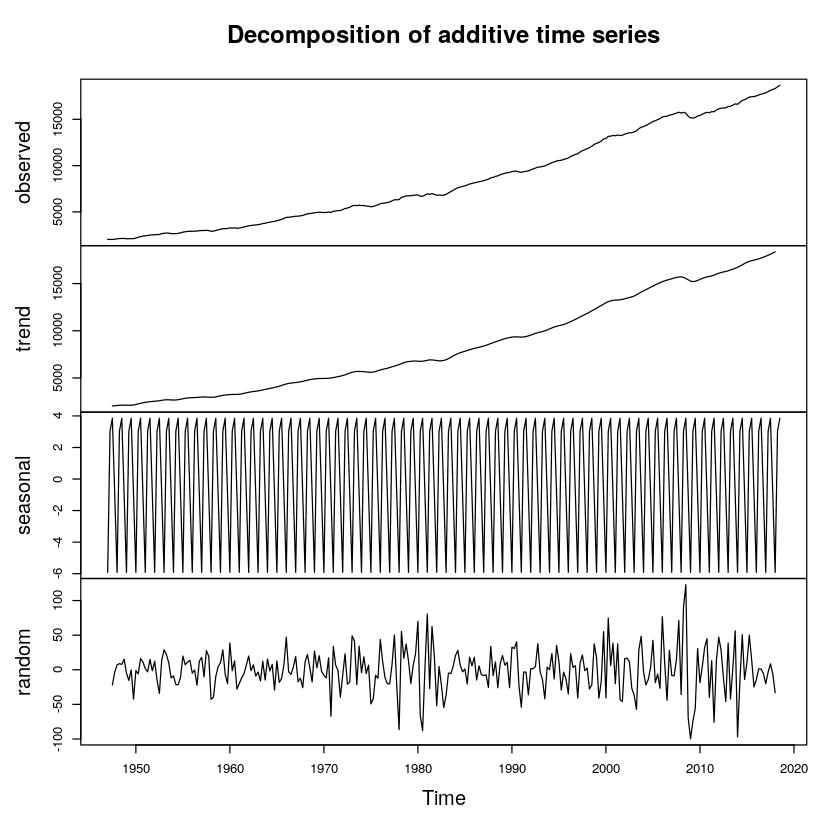

In [37]:
data_ts <- ts(gdp_us$value, frequency=4, start=c(1947,1))
attributes(data_ts)
dcomp<-decompose(data_ts, type=c("additive"))
plot(dcomp)

In [34]:
gdp_us$series_id  <- NULL

In [36]:
write.csv(gdp_us, file = "new_gdp_total.csv")

In [47]:
library(forecast)
d.arima <- auto.arima(data_ts)
d.forecast <- forecast(d.arima, level = c(95), h = 16)
autoplot(d.forecast)

In [48]:
autoplot(thetaf(data_ts, h=16))

In [49]:
autoplot(rwf(data_ts, h=16, drift=TRUE))

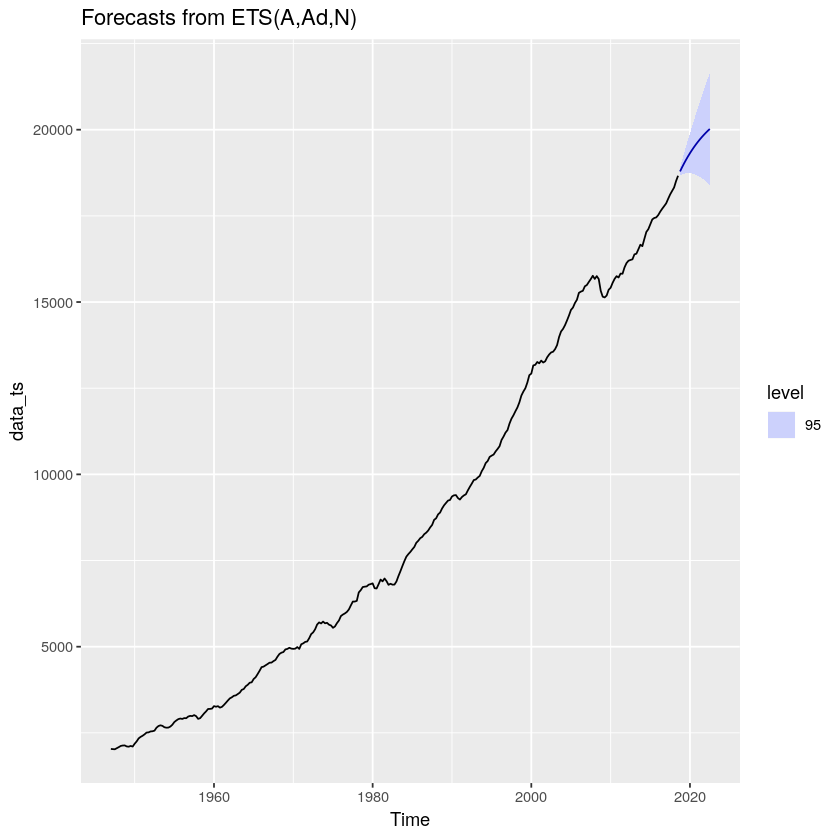

In [53]:
d.ets <- ets(data_ts)
d.forecast <- forecast(d.ets, level = c(95), h = 16)
autoplot(d.forecast)

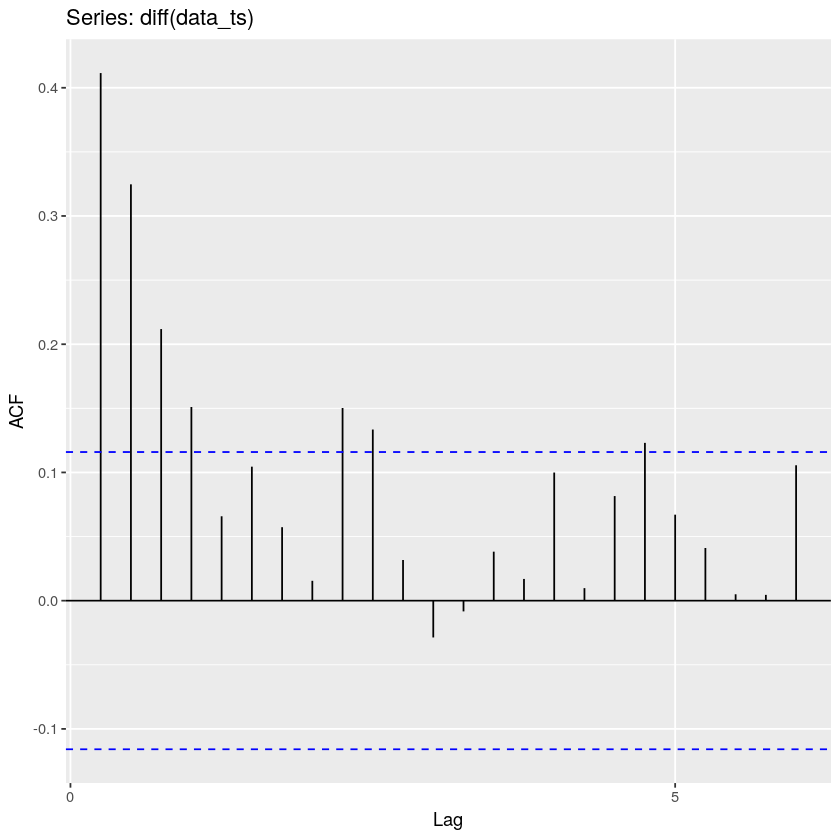

In [57]:
autoplot(acf(diff(data_ts), plot = FALSE))

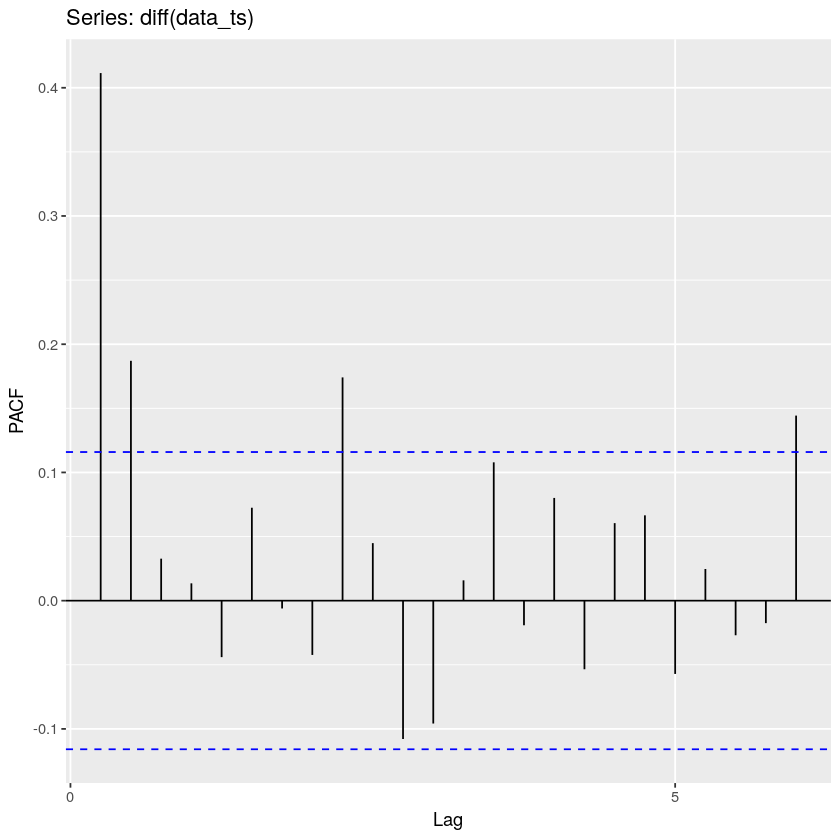

In [63]:
autoplot(pacf(diff(data_ts), plot = FALSE))